1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [101]:
from sklearn.datasets import make_regression

%load_ext autoreload
%autoreload 2

from resource import *
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
X_train, y_train, coef = make_regression(n_samples=1000,
                                         n_features=2,
                                         n_informative=2,
                                         n_targets=1,
                                         noise=25,
                                         coef=True,
                                         random_state=42)
# data_train = pd.DataFrame({'X': X_train[:, 0], 'Y': y_train})
data_train = pd.DataFrame({'X1': X_train[:, 0], 'X2': X_train[:, 1], 'Y': y_train})
X = data_train.drop('Y', axis=1)
Y = data_train['Y']

In [103]:
coef

array([40.71064891,  6.60098441])

In [104]:
np.linalg.inv(X.T @ X) @ X.T @ Y

0    41.608344
1     7.097666
dtype: float64

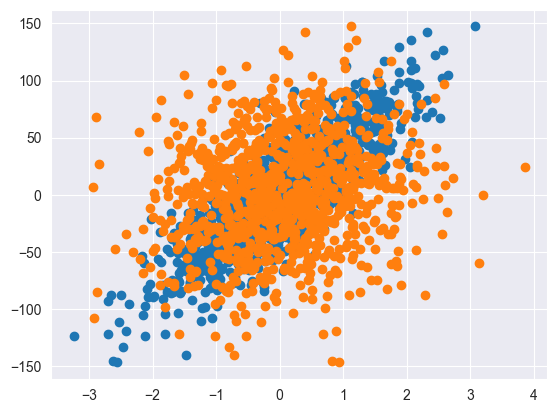

In [105]:
# посмотрим, что получилось

plt.plot(X_train, y_train, 'o')
plt.show()

In [106]:
from sklearn.linear_model import SGDRegressor

skl_regressor = SGDRegressor(max_iter=int(1e6), tol=1e-5, eta0=1e-3)
skl_l = skl_regressor.fit(X, Y)
skl_predictions = skl_regressor.predict(X)

print(skl_regressor.coef_, skl_regressor.intercept_)

[41.59079821  7.08828214] [0.04200504]


## Pseudocode
[Математические методы распознавания образов (курс лекций, В.В.Китов)](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2_%28%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9%2C_%D0%92.%D0%92.%D0%9A%D0%B8%D1%82%D0%BE%D0%B2%29)

```{python}
1. function gd(X, alpha, epsilon):
2. initialise beta
3. do:
4.  Beta = new_beta
5.  new_Beta = Beta - alpha*grad(X, beta)
6. until dist(new_beta, beta) < epsilon
7. return beta
```

## Stochastic gradient descent

```{python}
1. function sgd(X, alpha, epsilon):
2. initialise beta
3. do:
4.  X = shuffle(X)
5.  for x in X:
6.      Beta = new_beta
7.      new_Beta = Beta - alpha*grad(x, beta)
8. until dist(new_beta, beta) < epsilon
9. return beta
```

In [107]:
%%time
regressor = MyGradientLinearRegression(samples=X, targets=Y, alpha=1e-3, diff_mse=1e-5, print_cost=True)
l = regressor.fit()
w = regressor.get_weights()
w

Cost at iteration 100 is 1687.34070941454, weight=[7.79887854 2.14676628 1.10441077]
Cost at iteration 200 is 1351.7237648856071, weight=[13.50991193  3.08415543  1.14261745]
Cost at iteration 300 is 1120.3718221545817, weight=[18.25494192  3.84223123  1.13386208]
Cost at iteration 400 is 960.837635244128, weight=[22.19760136  4.45557597  1.0936266 ]
Cost at iteration 500 is 850.7905099612778, weight=[25.47376091  4.95205831  1.03336611]
Cost at iteration 600 is 774.8556447659914, weight=[28.19624744  5.35414343  0.96145394]
Cost at iteration 700 is 722.443146008736, weight=[30.458759    5.67994636  0.88391713]
Cost at iteration 800 is 686.2560764833298, weight=[32.33911344  5.94407925  0.80500739]
Cost at iteration 900 is 661.2646564524945, weight=[33.90194421  6.15833282  0.72764269]
Cost at iteration 1000 is 644.0006441423611, weight=[35.20093778  6.33222466  0.65374774]
Cost at iteration 1100 is 632.0717443509789, weight=[36.28069064  6.4734404   0.58451524]
Cost at iteration 1200 

array([41.55392922,  7.09084852,  0.05130972])

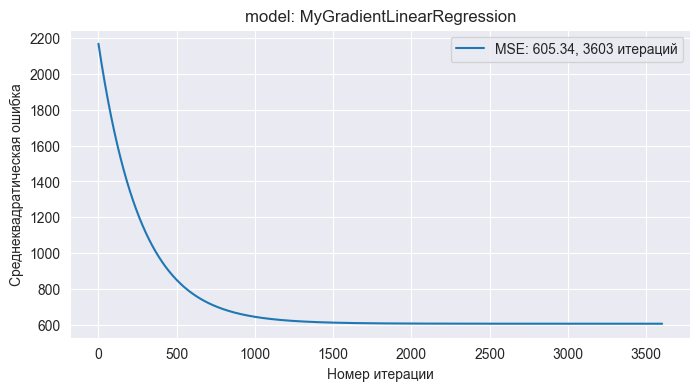

In [108]:
plot_learning_curves(model=regressor)

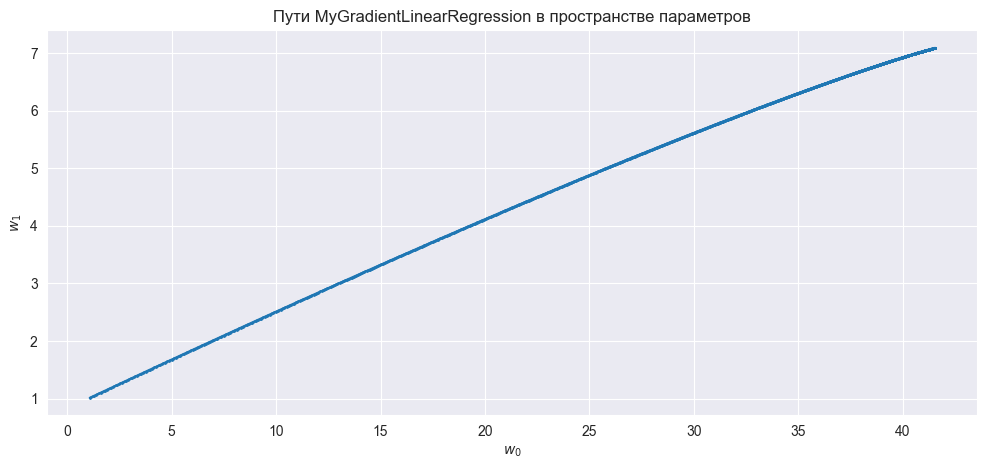

In [124]:
plot_weight_curves(regressor)

In [110]:
class MySGDLinearRegression(MyGradientLinearRegression):

    def _calc_gradient(self):
        n, k = self.samples.shape
        ind = np.random.randint(n)

        pred = self.samples[ind].reshape(-1, k) @ self.weight
        grad = 2 * (pred - self.targets[ind]) @ self.samples[ind].reshape(-1, k)

        return grad

In [111]:
%%time
sgd_regressor = MySGDLinearRegression(samples=X, targets=Y, alpha=1e-3, diff_mse=1e-5, print_cost=True)
sgd_l = sgd_regressor.fit()
sgd_w = sgd_regressor.get_weights()
sgd_w

Cost at iteration 100 is 1640.3991989101314, weight=[8.74165704 1.1565487  1.52639604]
Cost at iteration 200 is 1272.834223734506, weight=[15.23337607  2.28343838  1.89006892]
Cost at iteration 300 is 1052.339992864585, weight=[20.01945838  3.17959142  0.42669495]
Cost at iteration 400 is 913.883257138762, weight=[23.66323042  3.8551492   0.69050404]
Cost at iteration 500 is 828.9129792992217, weight=[26.1956938   5.16862012  0.20856648]
Cost at iteration 600 is 767.0449020845566, weight=[28.43135003  6.12269944  1.08495169]
Cost at iteration 700 is 711.2669795212232, weight=[30.93551087  6.94462733  1.23782741]
Cost at iteration 800 is 674.9449677429684, weight=[32.95756592  6.9640485   1.02206167]
Cost at iteration 900 is 650.22722464663, weight=[34.63800064  7.01902768  0.39877716]
Cost at iteration 1000 is 636.7898177815758, weight=[35.78612786  7.20097054 -0.15176942]
Cost at iteration 1100 is 626.609495769468, weight=[36.85737683  7.66671833 -0.16599702]
Cost at iteration 1200 is

array([41.54121283,  6.33872892,  0.27807346])

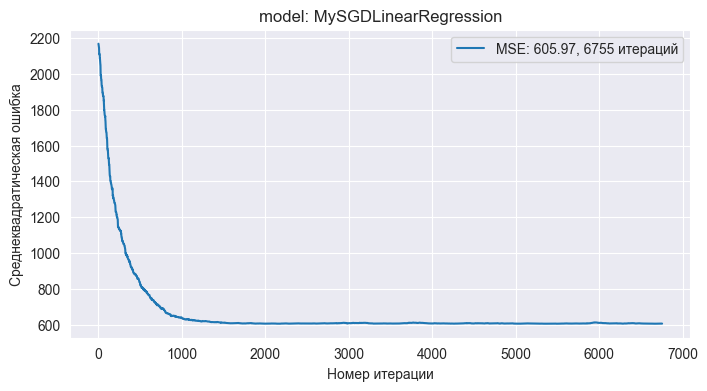

In [112]:
plot_learning_curves(model=sgd_regressor)

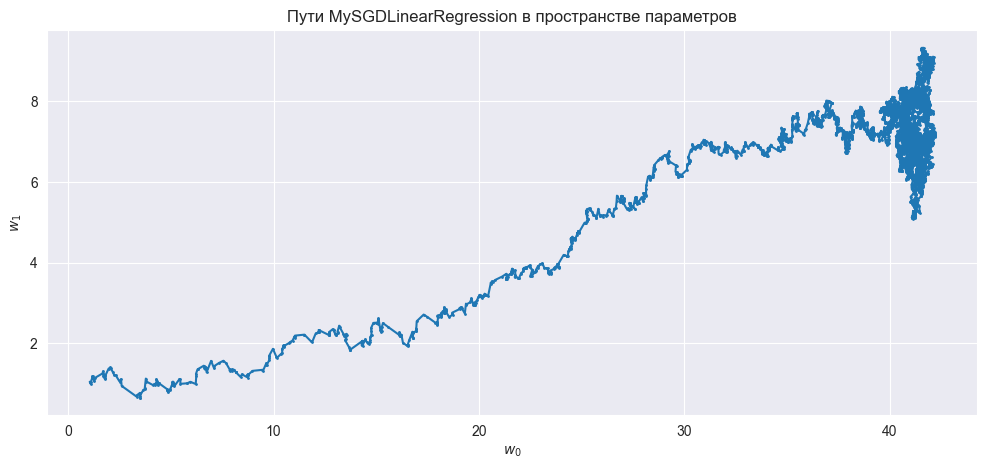

In [125]:
plot_weight_curves(sgd_regressor)

In [114]:
class MySGDBatchLinearRegression(MyGradientLinearRegression):

    def __init__(self, batch_size=32, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.batch_size = batch_size

    def _calc_gradient(self):
        n, k = self.samples.shape

        # Выбор случайных индексов
        indices = np.random.choice(np.arange(n), size=self.batch_size, replace=False)

        # Вычисление предсказаний и градиента
        pred = self.samples[indices] @ self.weight
        grad = 2 * (pred - self.targets[indices]) @ self.samples[indices] / self.batch_size

        return grad


In [115]:
%%time
sgd_bach_regressor = MySGDBatchLinearRegression(samples=X, targets=Y,
                                                alpha=1e-3, diff_mse=1e-5,
                                                batch_size=64,
                                                print_cost=True)
sgd_bach_l = sgd_bach_regressor.fit()
sgd_bach_w = sgd_bach_regressor.get_weights()
sgd_bach_w  # ideal [41.59177174  7.09518436] [0.04149802]

Cost at iteration 100 is 1685.239676040508, weight=[7.81510787 2.24711195 1.19944661]
Cost at iteration 200 is 1360.9271267190252, weight=[13.33549218  3.06981607  1.18828991]
Cost at iteration 300 is 1131.4937526008098, weight=[18.01394449  3.74555108  1.14152758]
Cost at iteration 400 is 969.4641531201811, weight=[21.96254445  4.42999281  1.10524005]
Cost at iteration 500 is 857.6038723739803, weight=[25.24574554  4.95612422  1.01737772]
Cost at iteration 600 is 780.2917288062438, weight=[27.96615416  5.44092939  0.95549021]
Cost at iteration 700 is 724.7711995807771, weight=[30.33118608  5.77887769  0.8400757 ]
Cost at iteration 800 is 688.0177263435743, weight=[32.23476612  5.96727335  0.83162061]
Cost at iteration 900 is 663.8956576667942, weight=[33.71305836  6.18685674  0.6809077 ]
Cost at iteration 1000 is 645.9751771277446, weight=[35.03487176  6.32945398  0.62812255]
Cost at iteration 1100 is 632.9934213403639, weight=[36.17922136  6.49565115  0.48340487]
Model alpha: 0.001, 

array([36.7862543 ,  6.5185506 ,  0.39703946])

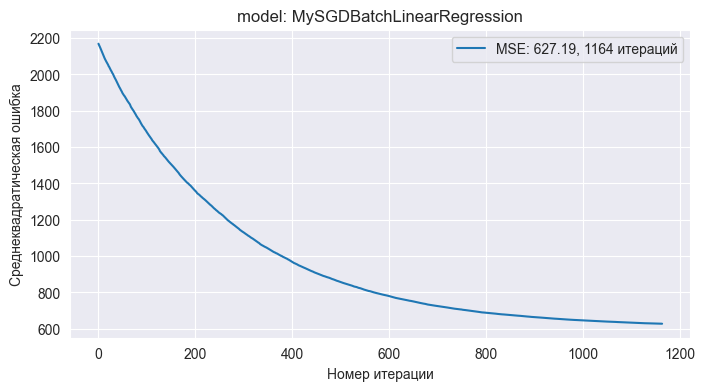

In [116]:
plot_learning_curves(model=sgd_bach_regressor)

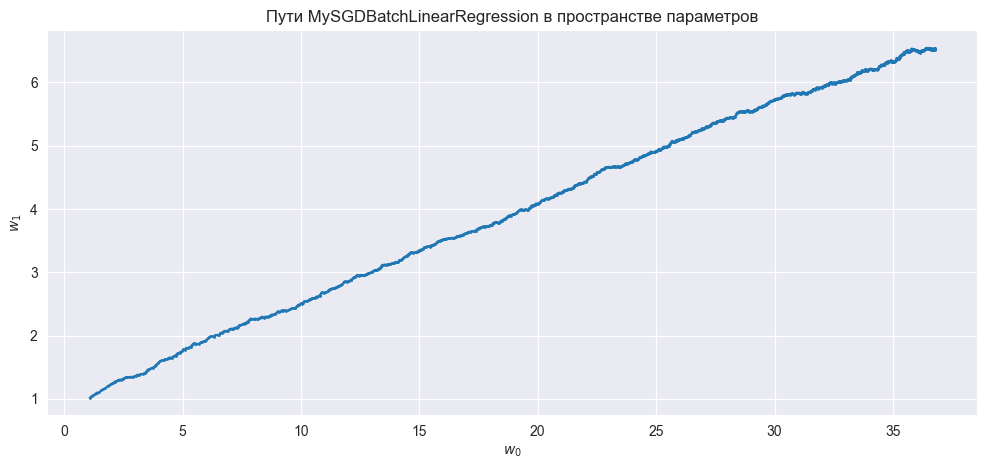

In [126]:
plot_weight_curves(sgd_bach_regressor)

In [118]:
class MyMiniBatchLinearRegression(MyGradientLinearRegression):
    def __init__(self, batch_size=32, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.batch_size = batch_size

    def _calc_gradient(self):
        n, k = self.samples.shape
        n_batches = n // self.batch_size
        if n % self.batch_size != 0:
            n_batches += 1

        gradient = np.zeros(k)

        for b in range(n_batches):
            start = b * self.batch_size
            end = (b + 1) * self.batch_size
            X_batch = self.samples[start:end]
            y_batch = self.targets[start:end]

            # Compute gradient for the batch
            pred = X_batch @ self.weight
            grad = 2 * (pred - y_batch) @ X_batch
            gradient += grad

        return gradient / n_batches


In [119]:
%%time
mini_bach_regressor = MyMiniBatchLinearRegression(samples=X, targets=Y,
                                                  alpha=1e-3, diff_mse=1e-5,
                                                  batch_size=32,
                                                  print_cost=True)
mini_bach_l = mini_bach_regressor.fit()
mini_bach_w = mini_bach_regressor.get_weights()
mini_bach_w

Cost at iteration 100 is 605.3524904376626, weight=[41.49228273  7.08532127  0.06391082]
Model alpha: 0.001, diff_mse: 1e-05, iterations: 143 ...
CPU times: total: 1.92 s
Wall time: 1.91 s


array([4.15984087e+01, 7.09476500e+00, 4.15082584e-02])

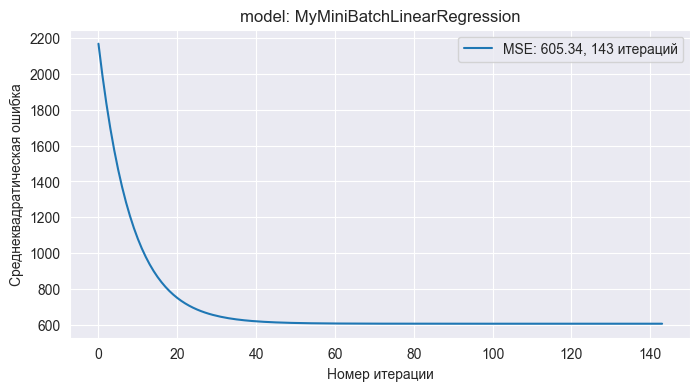

In [120]:
plot_learning_curves(model=mini_bach_regressor)

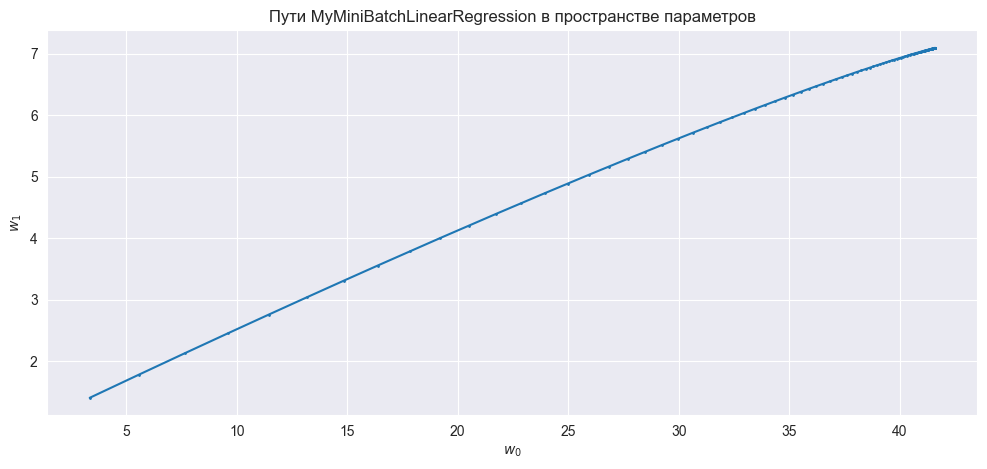

In [127]:
plot_weight_curves(mini_bach_regressor)

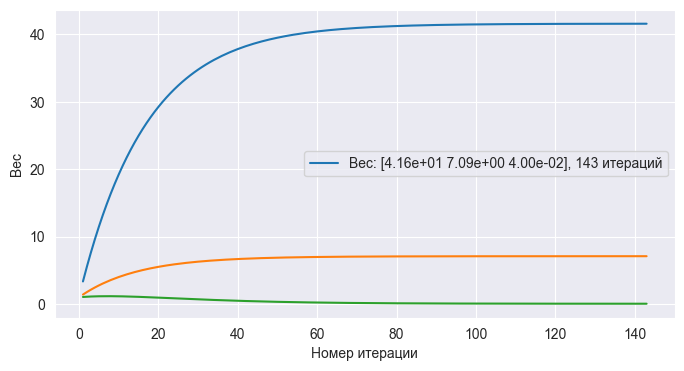

In [122]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

learning_path = mini_bach_regressor.weight_dict
plt.plot(learning_path.keys(), learning_path.values())
ax.set_xlabel('Номер итерации')
ax.set_ylabel('Вес')
ax.legend(['Вес: {}, {} итераций'.format(np.round(list(learning_path.values())[-1], 2),
                                         list(learning_path.keys())[-1])])
plt.show()

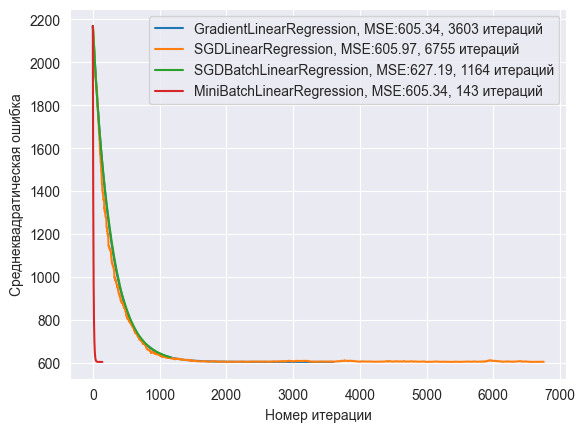

In [123]:
data = [(regressor, 'GradientLinearRegression'),
        (sgd_regressor, 'SGDLinearRegression'),
        (sgd_bach_regressor, 'SGDBatchLinearRegression'),
        (mini_bach_regressor, 'MiniBatchLinearRegression')
        ]

fig, ax = plt.subplots()

for model, label in data:
    learning_path = model.loss_dict
    ax.plot(learning_path.keys(), learning_path.values())

ax.set_xlabel('Номер итерации')
ax.set_ylabel('Среднеквадратическая ошибка')
ax.legend([f'{label}, MSE:{str(round(list(model.loss_dict.values())[-1], ndigits=2))}, {list(model.loss_dict.keys())[-1]} итераций'
           for model, label in data])

plt.show()


MSE на всех графиках стремится к 600 - это может означать, что модели достигли определенного предела в точности предсказаний. Возможно, дальнейшее улучшение точности будет требовать значительно больше данных или изменения модели.

Разница в количестве итераций между GradientLinearRegression, SGDLinearRegression и SGDBatchLinearRegression, которая практически одинакова, может указывать на то, что обе модели сходятся к оптимальным весам схожим образом. SGDLinearRegression сходится быстрее, так как использует стохастический градиентный спуск.

У MiniBatchLinearRegression итераций на порядок меньше, потому что она использует мини-пакетный градиентный спуск, который обновляет веса после каждого прохода по всему набору данных. Это может привести к более быстрой сходимости, особенно если есть большой объем данных.
**Преимущества**:
+ частота обновления модели выше, чем при пакетном градиентном спуске, но ниже чем в стохастическом градиентном спуске. Следовательно, этот вариант допускает более надежное схождение;
+ этот метод является вычислительно намного эффективнее, чем пакетный градиентный спуск или стохастический градиентный спуск, поскольку требуется меньше вычислений и ресурсов;
**Среди его недостатков**: использование этого варианта градиентного спуска вводит новый гиперпараметр, который необходимо отрегулировать - размер пакета (число наблюдений в мини-пакете).


2. [*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически).